In [22]:
using FourierFlows
using CairoMakie

grid1 = TwoDGrid(; nx=32, Lx=2π)
field1 = @. 2 * sin(4 * grid1.x + 3 * grid1.y' + π/4) - cos(1*  grid1.x - 2 * grid1.y') + 4 * sin(-2 * grid1.x + grid1.y' - π/4)

TwoDimensionalGrid
  ├───────────────── Device: CPU
  ├────────────── FloatType: Float64
  ├────────── size (Lx, Ly): (6.283185307179586, 6.283185307179586)
  ├──── resolution (nx, ny): (32, 32)
  ├── grid spacing (dx, dy): (0.19634954084936207, 0.19634954084936207)
  ├───────────────── domain: x ∈ [-3.141592653589793, 2.945243112740431]
  |                          y ∈ [-3.141592653589793, 2.945243112740431]
  └─ aliased fraction: 0.3333333333333333

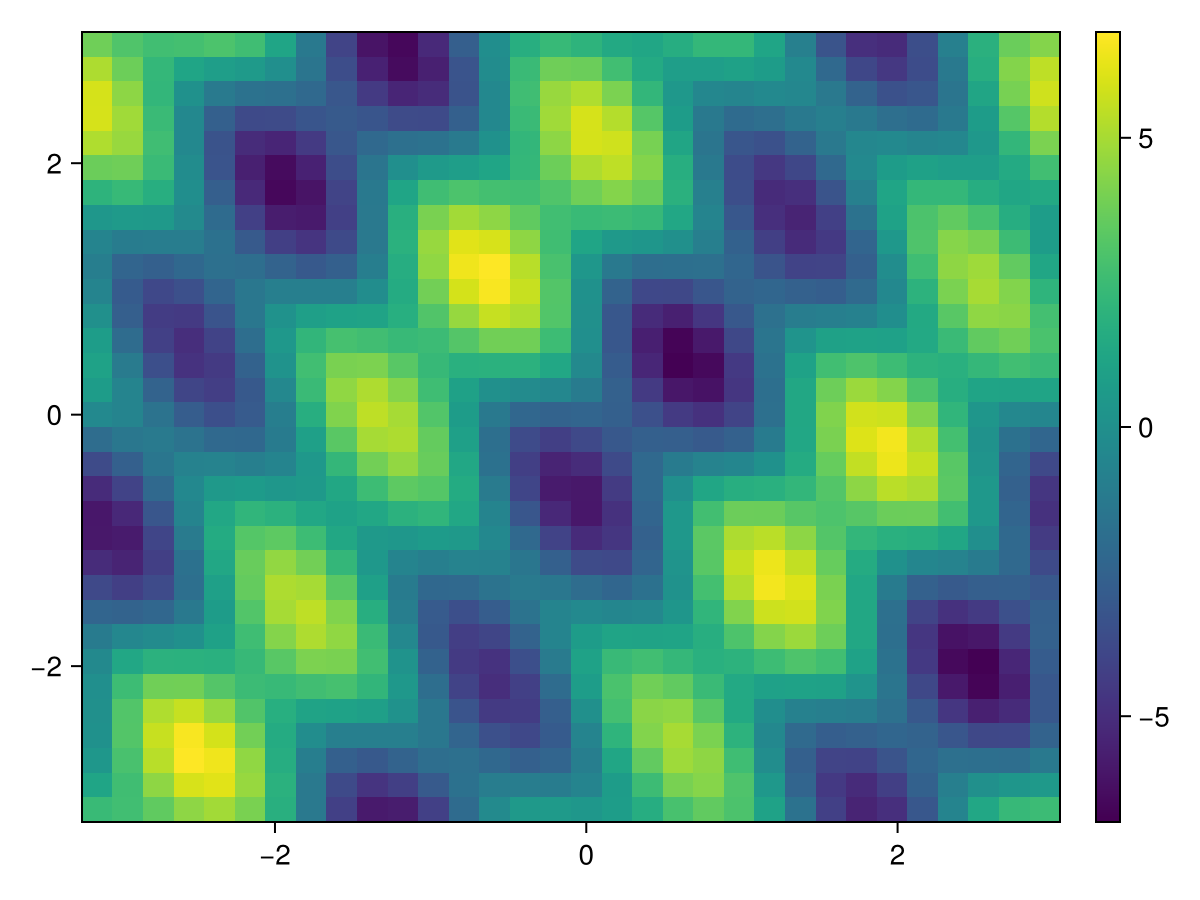

In [25]:
f = Figure()
ax = Axis(f[1,1])
hm = heatmap!(ax, grid1.x, grid1.y, field1)
Colorbar(f[1,2], hm)

f

In [90]:
grid2 = TwoDGrid(; nx=128, Lx=2π)
factor = grid2.nl^2 / grid1.nl^2
field1_h = rfft(field1)
field2_h = zeros(Complex{Float64}, grid2.nkr, grid2.nl)
half_nl = size(field1_h, 1)-1
@views field2_h[1:grid1.nkr, 1:half_nl] .= field1_h[:, 1:half_nl] * factor
@views field2_h[1:grid1.nkr, (end-half_nl+1):end] .= field1_h[:, (half_nl+1):end] * factor

field2 = irfft(field2_h, grid2.nx);

414.52338484575296
414.52338484575296
6.828544345425804
414.52338484575296
414.52338484575296
6.962803990425579


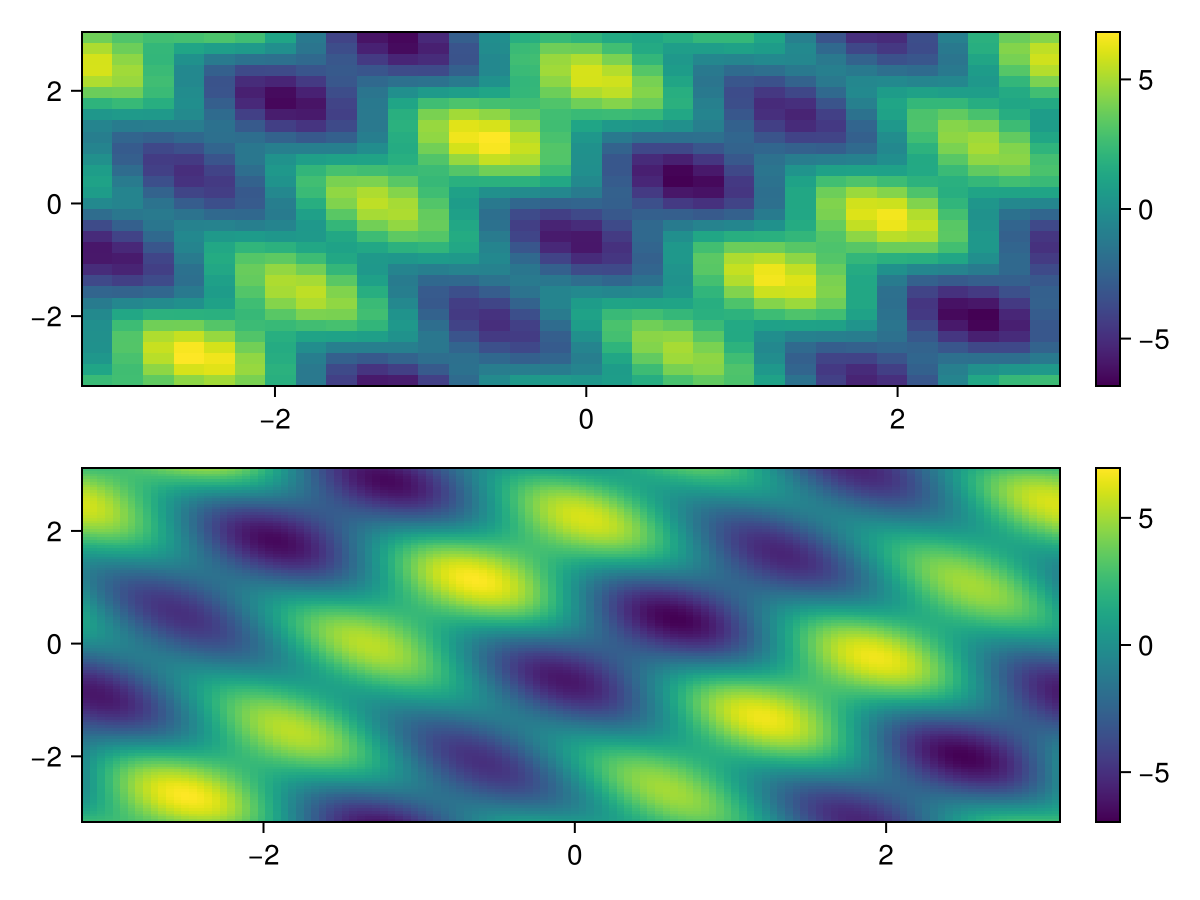

In [91]:
using FourierFlows: parsevalsum2

f = Figure()
ax1 = Axis(f[1,1])
hm1 = heatmap!(ax1, grid1.x, grid1.y, field1)
Colorbar(f[1,2], hm1)
println(parsevalsum2(field1_h, grid1))
println(sum(abs2.(field1) * grid1.dx * grid1.dy))
println(maximum(field1))

ax2 = Axis(f[2,1])
hm2 = heatmap!(ax2, grid2.x, grid2.y, field2)
Colorbar(f[2,2], hm2)
println(parsevalsum2(field2_h, grid2))
println(sum(abs2.(field2) * grid2.dx * grid2.dy))
println(maximum(field2))

f

In [92]:
println(size(field1_h))
println(size(field1_h[:, 1:half_nl]))
println(size(field1_h[:, (half_nl+1):end]))
println(size(field2_h[1:grid1.nkr, (end-half_nl):end]))

(17, 32)
(17, 16)
(17, 16)
(17, 17)


In [37]:
grid1.kr[:]

17-element Vector{Float64}:
  0.0
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0
 11.0
 12.0
 13.0
 14.0
 15.0
 16.0

In [40]:
abs.(field1_h)

32×32 Matrix{Float64}:
 3.44856e-14     3.35387e-14    3.77315e-14  …    3.77315e-14     3.35387e-14
 3.75673e-14     1.72982e-13    1.1091e-14      512.0             1.65017e-13
 1.18171e-13     1.60777e-13    1.15603e-13       1.45428e-13  2048.0
 3.66157e-14     1.94799e-13    4.16858e-14       6.54624e-14     1.86068e-13
 2.09203e-13     1.1195e-13     1.49094e-13       2.05282e-13     2.21273e-13
 1.95138e-14     1.16819e-13    6.01728e-14  …    9.59265e-14     1.64431e-13
 5.09089e-14     4.69697e-13    2.58395e-14       5.70057e-14     1.75079e-13
 5.26252e-14     5.26849e-14    7.31992e-14       2.52913e-14     1.8148e-13
 4.53316e-14     1.22053e-13    2.78098e-14       2.75463e-14     2.23991e-14
 2.61414e-14     9.82563e-14    1.09323e-14       3.01633e-14     5.93006e-14
 4.26207e-14     1.8527e-13     1.40421e-14  …    2.26048e-14     3.73354e-13
 8.56378e-15     9.87601e-14    5.69512e-14       1.02719e-14     6.83514e-14
 2.04488e-14     8.70101e-14    2.77892e-14       